In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from google.colab import files
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os

# List files in your Drive's root directory
os.listdir("/content/drive/My Drive/")


['HARSH.gdoc',
 'ARRAY.gdoc',
 'structure (2).gdoc',
 'structure (1).gdoc',
 'structure.gdoc',
 'Untitled document (20).gdoc',
 'Untitled document (19).gdoc',
 'EXP 12 (1).gdoc',
 'EXP 12.gdoc',
 'Untitled document (18).gdoc',
 'Untitled document (17).gdoc',
 'Untitled document (16).gdoc',
 'Untitled document (15).gdoc',
 'Untitled document (14).gdoc',
 'Untitled document (13).gdoc',
 'Resume.gdoc',
 'Untitled document (12).gdoc',
 'Untitled document (11).gdoc',
 '3.gdoc',
 '4.gdoc',
 'WhatsApp Chat with FE_J_2023-24_SEM 1_RAIT.txt',
 'IA-II_EE_Assignment _SEM 1_EE_SPECIALISED COURSES.docx',
 'Essay.gdoc',
 'Untitled document (10).gdoc',
 'Untitled document (9).gdoc',
 'Untitled document (8).gdoc',
 'Untitled document (7).gdoc',
 'Untitled document (6).gdoc',
 'Untitled document (5).gdoc',
 'BJT AMPLIFIERS.gdoc',
 'Pn junction .gdoc',
 'electronic circuit.gdoc',
 'PNJunction Diode.gdoc',
 'Untitled document (4).gdoc',
 'Untitled document (3).gdoc',
 'IMG_20230928_172204-PhotoRoom.png-P

In [ ]:
dataset_path = "/content/drive/MyDrive/Copy of epplant_dataset.zip"

In [ ]:
import zipfile

dataset_path = "/content/drive/MyDrive/Copy of epplant_dataset.zip"

# Open the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    # Print the names of the files within the zip file
    for file_name in zip_ref.namelist():
        print(file_name)



Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0001.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0002.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0003.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0004.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0005.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0006.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0007.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0008.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0009.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0010.jpg
Eggplant Disease Recognition Dataset/Augmented Images/Healthy Leaf/healthyleaf_aug0011.jpg

In [ ]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/Copy of epplant_dataset.zip"
extract_dir = "/content/dataset"  # Define the extraction directory

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    # Extract all files to the extraction directory
    zip_ref.extractall(extract_dir)

# Now you can list the files in the extracted directory
os.listdir(extract_dir)



['Eggplant Disease Recognition Dataset']

In [ ]:
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [ ]:
import tensorflow as tf
print(tf.__version__)  # Should print a version like 2.x.x


2.18.0


In [ ]:
# Load Training Data (80%)
train_generator = datagen.flow_from_directory(
    dataset_path,          # Dataset path
    target_size=(150, 150), # Resize all images to 150x150 pixels
    batch_size=32,         # Number of images processed at a time
    class_mode='binary', # Changed to binary to match the model's output
    subset='training'      # Load training subset
)

# Load Validation Data (20%)
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary', # Changed to binary to match the model's output
    subset='validation'  # Load validation subset
)


Found 2842 images belonging to 1 classes.
Found 710 images belonging to 1 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model for binary classification
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduces overfitting

    # **Binary Classification Output Layer**
    Dense(1, activation='sigmoid')  # **Changed to 1 neuron for binary classification**
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # **Changed loss function for binary classification**
    metrics=['accuracy']
)

# Print Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(
    train_generator,    # Training images
    validation_data=val_generator,  # Validation images
    epochs=10,  # Number of training cycles
    verbose=1  # Shows training progress
)




Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9612 - loss: 0.0412 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accura

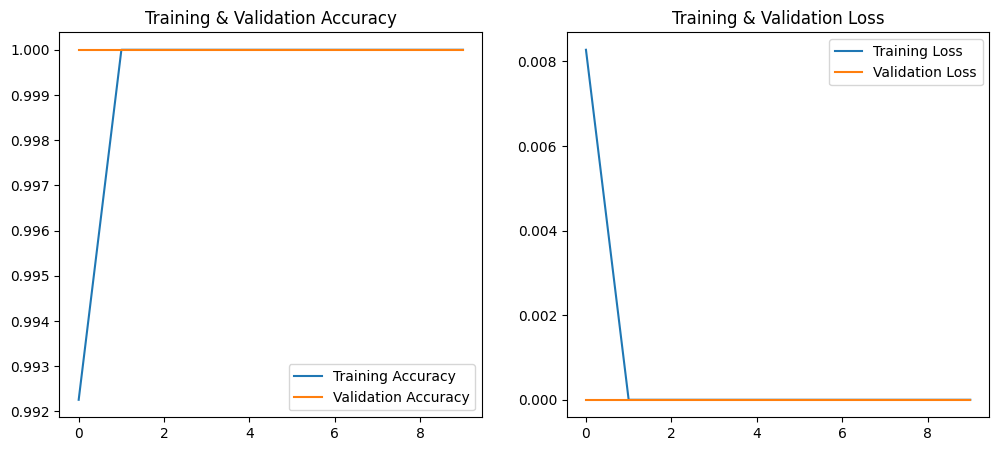

In [ ]:
import matplotlib.pyplot as plt

# Get accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot Accuracy Graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

# Plot Loss Graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')

plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {val_acc:.2%}")
print(f"🔴 Validation Loss: {val_loss:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 734ms/step - accuracy: 1.0000 - loss: 0.0000e+00
✅ Validation Accuracy: 100.00%
🔴 Validation Loss: 0.0000


In [42]:
 from google.colab import files
uploaded = files.upload() # Select an image to test


Saving brinjal.jpg to brinjal (3).jpg


In [43]:
img_path = "/content/brinjal.jpg"


In [47]:
img = image.load_img(img_path, target_size=(150, 150))  # Load image


In [50]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Load and preprocess the image
img_path = "/content/brinjal.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make a prediction
prediction = model.predict(img_array)

# Interpret the results
if prediction[0][0] > 0.5:
    print("🚨 Diseased Eggplant Detected!")
else:
    print("✅ Healthy Eggplant Detected!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
✅ Healthy Eggplant Detected!


In [ ]:
model.save('/content/eggplant_disease_model.h5')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [23]:
import os
print(os.listdir("/content/"))


['.config', 'brinjal.jpg', 'sample_data']


In [24]:
from google.colab import files
uploaded = files.upload()  # Select an image to test


Saving brinjal.jpg to brinjal (1).jpg


In [25]:
img_path = "/content/brinjal.jpg"  # Change filename accordingly
